# SNLO Tutorial 3 - Pulses

Here we'll see how to create pulses and calculate some things like their energy, temporal width, etc.

We start with the usual imports and definitions.

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt

import snlo.pulses as pulses

from scipy.constants import pi, c, epsilon_0
nm = 1e-9
um = 1e-6
mm = 1e-3
ps = 1e-12
fs = 1e-15
MHz = 1e6
GHz = 1e9
THz = 1e12
pJ = 1e-12
fJ = 1e-15
mW = 1e-3

#Larger font for plots
plt.rcParams.update({'font.size': 18})

## Time/Frequency Grids
We did this in the previous notebook.

In [2]:
#Let's set the bandwdith
λ_1 = 800*nm
λ_2 = 4.5*um
f_max = c/λ_1
f_min = c/λ_2
BW = f_max - f_min

N = 2**10 #I usually pick this one to be a power of 2 but that's not strictly necessary

T = N/BW #Time window size
Δt = 1/BW #Time resolution
t_start = -T/2 #Start of time window
#These are the time and frequency vectors 
t = t_start + np.arange(0, T, step=Δt)
f = fftfreq(N, Δt)

f_ref = (f_max + f_min)/2  #This variable will be supplied to several plotting functions
f_abs = f + f_ref #This is the absolute frequency vector
λ = c/f_abs #This is the wavelength vector

## Creating a pulse

There are two pre-defined pulse shapes: a gaussian and a sech. Let's start with a gaussian pulse.

In [3]:
λp = 2*um #Center wavelegnth of the pulse
Pavg = 10*mW #Average Power
τ = 80*fs #Pulse width:
frep = 250*MHz #Repetition rate
N_dB = 100 #Noise level (relative to the pulse peak)

pulse1 = pulses.gaussian_pulse(t, τ, Pavg=Pavg, f_ref=f_ref, f0=c/λp, Npwr_dB=N_dB, frep=frep)

Now let's calculate some things about this pulse:

In [4]:
print('Pulse Energy = %0.3f pJ' %(pulse1.energy_td()/pJ)) #integrated in the time domain
print('Pulse Energy = %0.3f pJ' %(pulse1.energy_fd()/pJ)) #integrated in the frequency domain
print('Peak Power = %0.3f W' %( np.amax(np.abs(pulse1.a)**2) )) #manually finding the peak
print('Center of pulse = %0.3f ps' %( pulse1.time_center()/ps ) )
print('Pulse width FWHM = %0.3f fs' %( pulse1.width_FWHM()/fs ) )

Pulse Energy = 40.024 pJ
Pulse Energy = 40.024 pJ
Peak Power = 470.001 W
Center of pulse = 0.000 ps
Pulse width FWHM = 80.022 fs


# Plotting functions

### Time domain

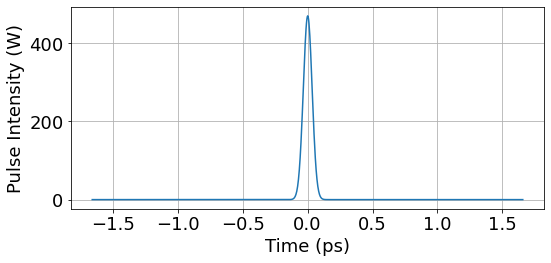

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4), tight_layout=True)
ax1 = pulse1.plot_magsq(ax=ax1, t_unit='ps') #you can pass an axis to the function

### Frequency Domain

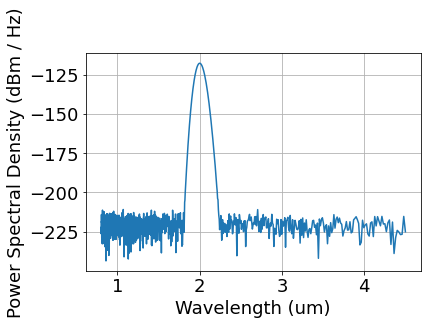

In [6]:
ax1 = pulse1.plot_PSD()

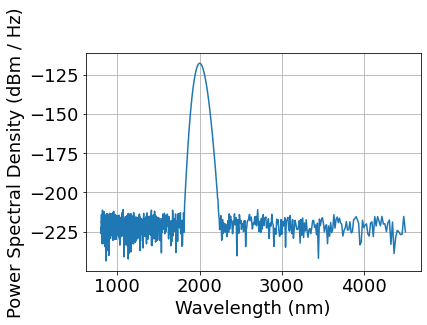

In [7]:
ax1 = pulse1.plot_PSD(f_unit = 'nm')

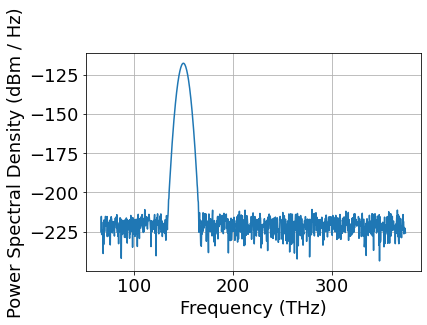

In [8]:
ax1 = pulse1.plot_PSD(f_unit = 'THz')

### Can also request linear units for the vertical axis

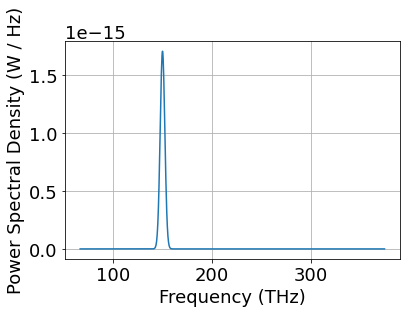

In [9]:
ax1 = pulse1.plot_PSD(f_unit = 'THz', dBm=False)

# Other features

### Move a pulse in the time domain

Center of pulse = -0.000 ps
Center of pulse = -0.500 ps


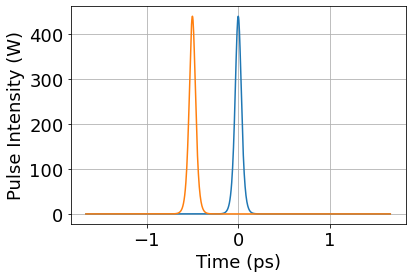

In [10]:
pulse2 = pulses.sech_pulse(t, τ, Pavg=Pavg, f_ref=f_ref, f0=c/λp, Npwr_dB=-N_dB, frep=frep)
ax1 = pulse2.plot_magsq()
print('Center of pulse = %0.3f ps' %( pulse2.time_center()/ps ) )

#Now move it
pulses.add_t_offset(pulse2, 0.5*ps)
ax1 = pulse2.plot_magsq(ax = ax1)
print('Center of pulse = %0.3f ps' %( pulse2.time_center()/ps ) )

### Add two pulses

Center of pulse = -0.500 ps


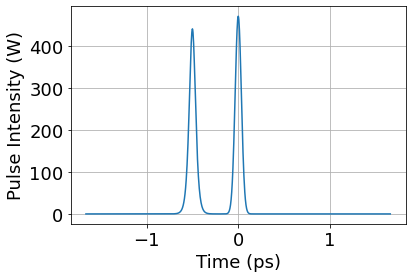

In [11]:
pulse3 = pulse1 + pulse2
ax1 = pulse3.plot_magsq()
print('Center of pulse = %0.3f ps' %( pulse2.time_center()/ps ) )

### Can also multiply by complex scalars

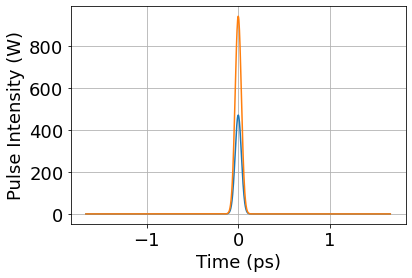

In [12]:
pulse4 = (1+1j)*pulse1
ax1 = pulse1.plot_magsq()
ax1 = pulse4.plot_magsq(ax = ax1)

### And even by other pulses

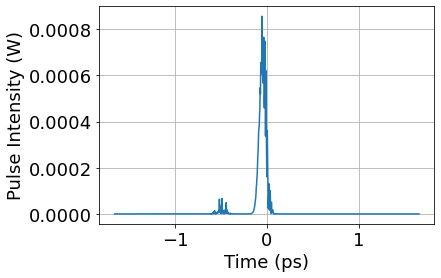

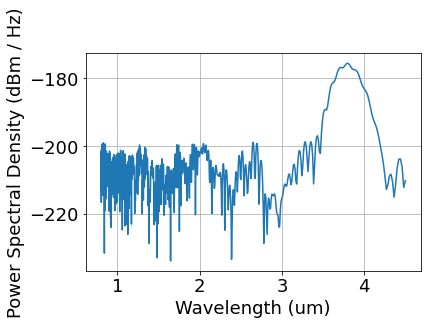

In [13]:
pulse5 = pulse1*pulse2
ax1 = pulse5.plot_magsq()
ax2 = pulse5.plot_PSD()